
## XOR문제란? 

XOR문제는 다음과 같습니다. 입력은 2개의 $x_1$, $x_2$에 해당하고 그 결과로는 $y$를 출력하는 논리회로 입니다. XOR연산은 eXclusion OR 의 줄임말이고, 출력의 특징은 두 입력이 같으면 0을, 다르면 1을 출력하는것 입니다. 아래의 표에서 입출력 구조를 확인하실 수 있습니다.

|($x_1$,$x_2$)|$y$|
|:---:|:---:|
|(0,0)|0|
|(0,1)|1|
|(1,0)|1|
|(1,1)|0|

In [137]:
import numpy as np

X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0,1,1,0]])

print('X:',X) #(2,4) => (샘플의 크기, 샘플의 개수)
print('Y:',Y) #(1,4)

X: [[0 0 1 1]
 [0 1 0 1]]
Y: [[0 1 1 0]]


우리는<br>  (0,0)=>0<br> (0,1)=>1<br>   (1,0)=>1<br>   (1,1)=>0<br>   이 나오는 딥러닝 모델을 만들고 싶다.

## 1.Weight, bias 초기화

우리는 레이어가 2개인 fully connected layer을 만든다.

In [138]:
# weight, bias 초기화

def init_parameters(num_hidden_units=2):
    W1 = np.random.randn(2,num_hidden_units)   # 가우시안분포(표준정규분포)를 만족하는 수를 가져와 (2,2)matrix를 만든다.
    B1 = np.zeros((num_hidden_units,1))        # (2,1)zero matirx 생성한다.
    W2 = np.random.randn(num_hidden_units, 1)
    B2 = np.zeros((1, 1))
    
    return W1,B1,W2,B2
    

## 2.어파인 변환(Affine Transformation)과 시그모이드 활성화 함수

- 어파인 변환 함수 (Affine transform) : $W^T\cdot X + B$ 

- 시그모이드 함수 (sigmoid function) : $\sigma(z) = \frac{1}{1 + e^{-z}}$

In [139]:
X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0,1,1,0]])

W1,B1,W2,B2 =init_parameters(num_hidden_units=2)

print('X.shape',X.shape)
print('Y.shape',Y.shape)
print('W1.shape',W1.shape)
print('B1.shape',B1.shape)
print('W2.shape',W2.shape)
print('B2.shape',B2.shape)

np.dot(X.T,B1).shape #(4,1)

X.shape (2, 4)
Y.shape (1, 4)
W1.shape (2, 2)
B1.shape (2, 1)
W2.shape (2, 1)
B2.shape (1, 1)


(4, 1)

In [140]:
# affine변환 과 sigmoid활성화 함수 정의

def affine(W, X, B):
  return np.dot(W.T,X)+B  #(2,2) (2,4) =>(2,4)

def sigmoid(z):
    return 1/(1+np.exp(-z))  

In [141]:
# 임의로 w, b, x를 만들고 affine 함수를 테스트 
w = np.arange(4).reshape(2,2)
b = [[1],[2]]
x = [[1],[1]]

print(affine(w, x, b)) # affine test -> [[3],[6]] 

print(sigmoid(0.1)) # sigmoide test -> 0.524979

[[3]
 [6]]
0.52497918747894


## 3.손실함수: 이진 크로스 엔트로피(Binary Cross Entropy)


$$\text{Binary Cross Entropy}(y, \hat{y}) = -\frac{1}{N}\sum_{i=1}^n  (y_i \cdot \log(\hat{y_i}) + (1 - y_i) \cdot \log(1 - \hat{y_i}) )$$

- $y_i$ : $i$ 번째 정답 값 (0 or 1)
- $\hat{y_i}$ : $i$ 번재 추정 값 ($0<\hat{y}<1$)
- $\log$ : 자연로그 
- $N$ : 샘플의 수

In [122]:
X.shape

(2, 4)

In [142]:
# 손실함수 정의 

def binary_cross_entropy(Y, YHat):
    N = X.shape[1]                                              # N=4
    loss = -(1/N)*np.sum(Y*np.log(YHat)+ (1-Y)*np.log(1-YHat))  # 4로 나누는 이유? 입력으로 1행4열이 2개 들어가고
                                                                #  YHat이 4개가 나온다. 이를 4로 나눠야 전체의 평균이다.
    return loss


## 4.순방향(forward) 연산

In [143]:
# 순방향 함수 정의

def forward_loss(X, Y, _params):
    W1, B1, W2, B2 = _params 
    
    # layer[1]
    Z1 = affine(W1,X,B1)
    H1 = sigmoid(Z1)
    
    # layer[2]
    Z2 = affine(W2,H1,B2)
    YHat = sigmoid(Z2)
    
    # loss
    loss = binary_cross_entropy(Y,YHat)
    
    return Z1,H1,Z2,YHat,loss
    

## 5.역방향(Backward) 연산

In [144]:
X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0,1,1,0]])

W1,B1,W2,B2 =init_parameters(num_hidden_units=2)


m = X.shape[1] # 샘플의 수

Z1,H1,Z2,YHat,loss = forward_loss(X, Y, [W1, B1, W2, B2])

print('X.shape',X.shape)
print('Y.shape',Y.shape)
print('W1.shape',W1.shape)
print('B1.shape',B1.shape)
print('Z1.shape',Z1.shape)
print('H1.shape',H1.shape)
print('W2.shape',W2.shape)
print('B2.shape',B2.shape)
print('Z2.shape',Z2.shape)
print('YHat.shape',YHat.shape)
print('loss',loss)


X.shape (2, 4)
Y.shape (1, 4)
W1.shape (2, 2)
B1.shape (2, 1)
Z1.shape (2, 4)
H1.shape (2, 4)
W2.shape (2, 1)
B2.shape (1, 1)
Z2.shape (1, 4)
YHat.shape (1, 4)
loss 0.7152266071423813


In [176]:
# 경도(방향) 찾기

def get_gradients(X, Y, _params):
    
    W1, B1, W2, B2 = _params
    m = X.shape[1] # 샘플의 수
    
    Z1,H1,Z2,YHat,loss = forward_loss(X, Y, _params)
    print('loss:',loss)
    
    dZ2 = (1/m)*(YHat-Y)    # H1  dZ2.T =Z2.T     dW2=w2                                  
    dW2 = np.dot(H1, dZ2.T) #(2,4)(4,1) => (2,1) backward   ###################중요###############
    dB2 = np.sum(dZ2, axis=1, keepdims=True)
    
    
    dH1 = np.dot(W2,dZ2)
    dZ1 = (1/m)*dH1*H1*(1-H1) 
    dW1 = np.dot(X, dZ1.T)
    dB1 = np.sum(dZ1, axis=1 ,keepdims=True)  
    
    
    
    return [dW1, dB1, dW2, dB2], loss  

## 6. Weight, bias 업데이트

In [174]:
def optimize (X, Y, _params, learning_rate = 0.1, iteration = 1000):

    #params = np.copy(_params) # 파라미터 복사
    #np.copy()
    loss_trace = [] # 손실 값 저장 

    for epoch in range(iteration): # 학습 반복 
        dparams, loss = get_gradients(X, Y, params) # 그레디언트 추출 
        print('epoch:',epoch)
        for param, dparam in zip(params, dparams): 
            param += - learning_rate * dparam # 경사하강법 구현 

        if (epoch % 100 == 0): # 손실값 저장 
            loss_trace.append(loss)

    _, _, _, Y_hat_predict, _ = forward_loss(X, Y, params) # 학습된 모델로 추론 

    return params,loss_trace, Y_hat_predict

In [177]:
X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4) # 입력
Y = np.array([0, 1, 1, 0]).reshape(1,4) # 정답 

params = init_parameters(2) # 파라미터 세팅 
new_params, loss_trace, Y_hat_predict = optimize(X, Y, params, 0.1, 150000) # 학습 및 추론 

print(Y_hat_predict) # 정답 Y와 유사한 값이 나왔다면 학습이 잘 진행된 것 입니다. 

loss: 0.7172176481365218
epoch: 0
loss: 0.7155283727274684
epoch: 1
loss: 0.7139493785005905
epoch: 2
loss: 0.7124737219749562
epoch: 3
loss: 0.7110948617569364
epoch: 4
loss: 0.7098066398701222
epoch: 5
loss: 0.7086032633250365
epoch: 6
loss: 0.7074792860259429
epoch: 7
loss: 0.706429591094564
epoch: 8
loss: 0.7054493736749234
epoch: 9
loss: 0.7045341242697374
epoch: 10
loss: 0.7036796126466802
epoch: 11
loss: 0.7028818723422929
epoch: 12
loss: 0.7021371857821677
epoch: 13
loss: 0.701442070028209
epoch: 14
loss: 0.7007932631570908
epoch: 15
loss: 0.7001877112684046
epoch: 16
loss: 0.6996225561162889
epoch: 17
loss: 0.6990951233544598
epoch: 18
loss: 0.6986029113814102
epoch: 19
loss: 0.6981435807700265
epoch: 20
loss: 0.6977149442639135
epoch: 21
loss: 0.697314957321228
epoch: 22
loss: 0.6969417091857487
epoch: 23
loss: 0.6965934144641843
epoch: 24
loss: 0.6962684051882946
epoch: 25
loss: 0.6959651233402238
epoch: 26
loss: 0.6956821138194794
epoch: 27
loss: 0.6954180178301883
epoch: 2

## 7. loss 시각화

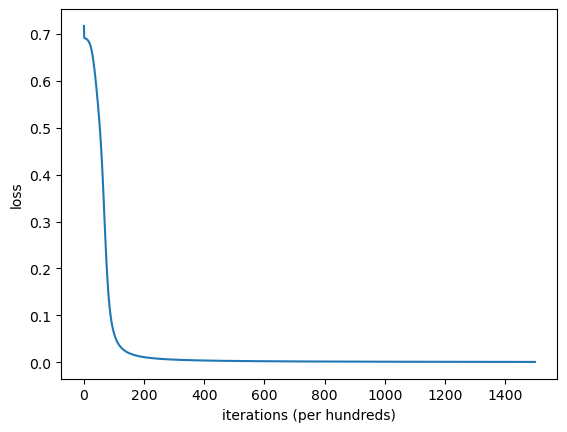

In [178]:
import matplotlib.pyplot as plt

# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()